# O uczeniu maszynowym z przykładami

Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>



Letnia Szkoła Fizyki 2023 <br>


**Uczenie maszynowe** , samouczenie się maszyn albo systemy uczące się (ang. machine learning) – obszar sztucznej inteligencji poświęcony algorytmom, które poprawiają się automatycznie poprzez doświadczenie, czyli ekspozycję na dane. 

[Uczenie maszynowe. Wikipedia : wolna encyklopedia, 2022-12-23 20:26Z](https://pl.wikipedia.org/wiki/Uczenie_maszynowe)



**Algorytm** – skończony ciąg jasno zdefiniowanych czynności koniecznych do wykonania pewnego rodzaju zadań, sposób postępowania prowadzący do rozwiązania problemu. Można go przedstawić na schemacie blokowym.

[Algorytm. Wikipedia : wolna encyklopedia, 2023-03-13 09:38Z](https://pl.wikipedia.org/wiki/Algorytm) 

<div class="row">
  <div class="col-md-6" markdown="1">
  <img height="600px" class="center-block" alt="block diagram", 
       src="./fig_png/diagram_1.png">
  </div>
  <div class="col-md-6" markdown="1">  
      
   **Dane** - dowolny zestaw liczb: **X**
      <br> <br> <br>
   **Wynik** - dowolny inny zestaw liczb: **Y** 
      <br> <br> <br> 
   **Zadanie** - wykonanie obliczeń na danych, czyli znalezienie wartości pewnej funkcji, np.<br>
      znalezienie pierwiastków równania kwadratowego:
  <br> <br> <br> 
    $$
    \huge{
     a\cdot x^{2} + b\cdot x + c = 0
    }
    $$
    </div>
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = np.random.default_rng().uniform(-1,1)
b = np.random.default_rng().uniform(-1,1)
c = np.random.default_rng().uniform(-1,1)

X = np.random.default_rng().uniform(-10,10,1000)
Y = a*X*X + b*X + c

fig, axis = plt.subplots(1,1, figsize=(5,5))
axis.plot([-10,10],[0,0], color="black");
axis.plot(X,Y,"p", markersize=1, color="red", label = "a={:3.2f}\n b={:3.2f}\nc={:3.2f}".format(a,b,c))
axis.legend();

In [ ]:
def quadraticEqSolution(coeff):
    a = coeff[:,0:1]
    b = coeff[:,1:2]
    c = coeff[:,2:3]
    
    delta = b**2 - 4*a*c
    delta = delta.reshape(-1,1)
    
    result = np.where(delta>0, np.sqrt(delta), 0.0)
    result = result*np.array([-1,1])
    result = (result - b)/(2.0*a)
    result = np.where(delta>0, result, None)
    
    return result 
#######################
result = quadraticEqSolution(np.array([[a,b,c]]))  

print("Result:",result)
if result.any():
    print("Solution check:", a*result**2+b*result+c)

<div class="row">
  <div class="col-md-6" markdown="1">
  <img height="600px" class="center-block" alt="block diagram", src="./fig_png/diagram_3.png">
  </div>
  <div class="col-md-6" markdown="1"> 
      
   **Podejście "klasyczne"** - dla każdego zagadnienia definiujemy (my=człowiek) odpowiedni algorytm.
    <br> <br> <br> 
          
   </div>
</div>

<div class="row">
  <div class="col-md-6" markdown="1">
  <img height="600px" class="center-block" alt="block diagram", src="./fig_png/diagram_4.png">
  </div>
  <div class="col-md-6" markdown="1"> 
      
   **Podejście "maszynowe"** - definiujemy zbiór funkcji, numerowawany parametrami $\theta$:
    <br> <br> <br> 
    $$
    \huge{
     f(X, \theta)
    }
    $$
    <br> <br> <br>
    który może zawierać funkcję która rozwiązuje nasz problem:
    <br> <br> <br> 
    $$
    \huge{
     f(X, \hat{\theta}) = Y
    }
    $$
          
   </div>
</div>

In [ ]:
X = np.random.default_rng().uniform(-1,1,(10000,3))
Y = quadraticEqSolution(X) 
Y = (Y[:,0]!=None).reshape(-1,1)

print("Random quadratic equation:",X[0])
print("This equation has a solution:",Y[0])

In [ ]:
nPoints = 500
import plotly.express as px
fig = px.scatter_3d(x=X[0:nPoints,0], y=X[0:nPoints,1], z=X[0:nPoints,2], 
                    color=Y[0:nPoints,0], size = np.full((nPoints), 0.1),
                    labels={"x":"a", "y":"b", "z":"c"})
fig.show()

**Pytanie:** czy istnieje zbiór funkcji $f(X, \theta)$ który zawiera funkcję poszukiwaną dla danego problemu?

**Odpowiedź:** Oczywiście -  są na to odpowiednie twierdzenia, np. twierdzenie o szeregach Fouriera: każdą funkcję okresową można przedstawić jako szereg: 

  $$
    \huge{
    f(X, a_{n}, b_{n}) = \frac{a_{0}}{2} + \\
    \sum_{n=1}^{\infty} a_{n}\cos(n \omega x) + b_{n}\sin(n \omega x),~\omega = \frac{2\pi}{T}
    }
    $$

**Zagadnienie**: pewien problem jest rozwiązywany przez funkcję, która ma postać:

$$
    \huge{
    f(X) = 
    \begin{cases}
  1 & \text{gdy x>0 i x<0.5} \\
  0 & \text{w każdym innym przypadku}
 \end{cases}
    }
$$      

In [ ]:
import matplotlib.pyplot as plt

X = np.random.default_rng().uniform(0,1,1000)
Y = (X>0)*(X<0.5)
Y = Y.astype(np.float64)

fig, axis = plt.subplots(1,1, figsize=(5,5))
axis.plot(X,Y,"o", color="red");

In [ ]:
nMax = 0
omega = 2*np.pi/1.0

Y_model = np.full_like(X,0.5)
for n in range(1,nMax+1, 2):
   Y_model += 2.0/np.pi*1/n*np.sin(omega*n*X) 

fig, axis = plt.subplots(1,1, figsize=(5,5))
axis.plot(X,Y,"o", color="red", label="Dane");
axis.plot(X,Y_model,"o", markersize=2, label="Model");
axis.legend();

...są też inne twierdzenia, np. twierdzenie Taylora, które mówi, że każdą (rozsądną) funkcję można zapisać jako nieskończoną sumę wielomianów: 

$$
\huge{
f(x, a_{n}) = 
\sum_{n=0}^{\infty} a_{n}x^{n} = \\
a_{0} + a_{1}x + a_{2}x^{2} +...
}
$$

<div class="row">
  <div class="col-md-7" markdown="1">
  <img height="700px" class="center-block" alt="block diagram", src="./fig_png/diagram_5.png">
  </div>
  <div class="col-md-5" markdown="1"> 
      Model: 
      <br> <br>
    $$
    \huge{
     Y(X, a_{n}) = \\
     \sum_{n=0}^{n} a_{n}x^{n}
    }
    $$
          
   </div>
</div>

dla funkcji $\sin(x)$ szereg Taylora ma postać:

$$
 \huge{
    \sin(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - ... \\ 
    = \sum_{k=0}^{k=\infty} (-1)^{k}\frac{x^{2k+1}}{(2k+1)!}
    }
$$

zobaczmy jak możemy obliczyć silnię w komputerze:

$$
 \huge{
    n! = 1 \cdot 2 \cdot ... \cdot (n-1) \cdot n
    }
$$

In [ ]:
n = 100
factorial = np.math.factorial(n)
print("n! =",factorial)

obliczanie silni dla dużych liczb jest problematyczne. Użyjemy sztuczki:


$$
 \huge{
    \frac{z^{53}}{53!} = \frac{z^{51}}{51!} \cdot \frac{z^{2}}{52 \cdot 53} 
    }
$$

In [ ]:
z = 0.5
previousTerm = 0.0123
k = 10

nextTerm = previousTerm*np.power(z,2)/(2*k)/(2*k+1)
print("nextTerm:",nextTerm)

In [ ]:
n = 1
omega = 2*np.pi/1.0
Y_model = omega*n*X
kMax = 1

tmpTerm = omega*n*X
for k in range(1,kMax,1):
    tmpTerm *= np.power(omega*n*X,2)/(2*k)/(2*k+1)
    Y_model += np.power(-1,k)*tmpTerm
        
fig, axis = plt.subplots(1,1, figsize=(5,5))
axis.plot(X,Y_model,"o", markersize=2, label="Model");
axis.set_ylim(-1,1);

Rozwinięcia są znane tylko dla niektórych funkcji. Dla funkcji które spotykamy w rzeczywistych zagadnieniach nie są znane współczynniki rozwinięć, nawet same funkcje nie są znane!
<br><br><br>
Co zrobić z tym wypadku?
<br><br><br>
Trzeba znaleźć współczynniki rozwinięcia metodą "eksperymentalną":

<br>
<br>

1) **definiujemy** model: wybieramy jakąś bazę funkcji: ($\sin(x)$, $~\cos(x)$, $~x^{n}$, ...) 

<br>
<br>

2) **trenujemy** model: znajdujemy współczynniki rozwinięcia naszej nieznanej fukcji używając jakiegoś algorytmu 

<br>
<br>

3) używamy znalezionych współczynników mając nadzieję że są poprawne...

Parametry modelu znajdujemy minimalizując miarę zgodności modelu z danymi -  **funkcję straty** (ang. loss function):
<br>
<br>

$$
\huge{
L(f(X), Y)
}
$$

<br>
<br>

funkcja straty zależy od zagadnienia. W sytuacji gdy model ma przewidywać wartość o dowolnym zakresie używamy zwykle **średniego błędu kwadratowego:**



$$
\huge{
L(f(X), Y) = \frac{1}{N} \sum_{X} (f(x) - y)^{2}
}
$$

gdzie N to rozmiar zbioru danych.



W jaki sposób znajdujemy optymalne parametrey modelu? 


`Obliczamy zmianę funkcji straty względem parametrów modelu, następnie zmieniamy trochę parametry tak by funkcja straty zmalała.`$^{*}$


Procedurę powtarzamy tak długo, aż... jesteśmy zadowoleni z wyniku.

<br><br><br><br><br><br><br><br>
$^{*}$ - obliczamy gradient funkcji straty względem parametrów modelu: $\nabla_{\theta} L$ i zmieniamy parametry w kierunku przeciwnym do wskazanego przez gradient.

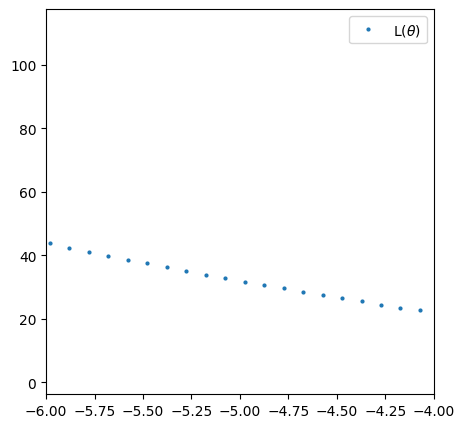

In [36]:
theta = np.linspace(-10,10,200)
L = theta**2-theta + 2

fig, axis = plt.subplots(1,1, figsize=(5,5))
axis.plot(theta,L,"o", markersize=2, label=r"L($\theta$)");
axis.set_xlim(-6,-4);
axis.legend();

1) wybieramy początkowe parametry modelu: $\theta$


2) wybieramy część danych i obliczamy na niej wartość funkcji straty: `batch`

3) obliczamy zmianę funkcji straty względem parametrów: $\nabla_{\theta} L$

4) zmieniamy parametry $\theta$ proporcjonalnie do zmiany funkcji straty, parametr proporcjonalności $\alpha$ to `współczynnik uczenia` (ang. `learning rate`):
<br>
<br>
$$
\huge{
 \theta_{new} = \theta_{old} - \alpha \cdot \nabla_{\theta} L
}
$$
<br>

5) przechodzimy przez wszystkie dane w paczkach. Jedno przejście przez wszystkie dane to `epoka` (ang. `epoch`)

Przeprowadźmy procedurę `treningu` dla modelu wynikającego z twierdzenia Taylora: 
<br>
<br>
$$
\huge{
f(x, a_{n}) = 
\sum_{n=0}^{\text{polyDegree}} a_{n}x^{n} = \\
a_{0} + a_{1}x + a_{2}x^{2} + ... + a_{\text{polyDegree}}x^{\text{polyDegree}}
}
$$
<br>
<br>

W tej sytuacji nasz model jest wielomianem stopnia `polyDegree`.

In [ ]:
polyDegree = 0

model = np.polynomial.polynomial.Polynomial(coef=np.zeros(polyDegree+1))
model = model.fit(X,Y, deg = polyDegree)
Y_model = model(X)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(X,Y,"o", color="red", label="Dane");
axes[0].plot(X,Y_model,"o", markersize=2, label="Model");
axes[0].legend()

axes[1].plot(model.convert().coef,"o", color="red", label="Coefficients");
axes[1].legend();

Funkcja której używamy jako bazy nazywa się **funkcją aktywacji**. Zamiast funkcji trygonometrycznych, czy wielomianów w uczeniu maszynowym zwykle używa się znacznie prostrzej funkcji - funkcji ReLU (ang. "Rectified Linear Unit):
<br><br><br><br>
$$
\huge{
    a(x) = 
    \begin{cases}
  0 & \text{gdy x < 0} \\
  x & \text{gdy x}\geq 0
 \end{cases}
    } 
$$
<br><br><br>
...jest oczywiście odpowiednie twierdzenie, które mówi że dowolną funkcję można zapisać jako nieskończoną sumę funkcji `ReLU`.

In [ ]:
xx = np.linspace(-1,1,100)
a = xx*(xx>0)

fig, axis = plt.subplots(1,1, figsize=(5,5))
axis.plot(xx, a, "o", color="red", label="ReLU");
axis.legend();

<div class="row">
  <div class="col-md-7" markdown="1">
  <img height="600px" class="center-block" alt="block diagram", src="./fig_png/diagram_6.png">
  </div>
  <div class="col-md-5" markdown="1"> 
      Model: 
      <br> <br>
    $$
    \Large{
     Y(X, a_{n}) = \\
     \sum_{n=0}^{n_{max}} a_{n}ReLU(w_{n}x + b_{n})
    }
    $$
          
   </div>
</div>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

nUnits = 32

inputs = tf.keras.Input(shape=(1,))
layer = tf.keras.layers.Dense(nUnits, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(layer)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss = 'mse')

In [ ]:
Y = (X>0)*(X<0.5)

history = model.fit(X,Y,epochs=50, verbose=0)
Y_model = model.predict(X)

fig, axes = plt.subplots(1,2, figsize=(11,5))
axes[0].plot(X,Y,"o", color="red", label="Dane");
axes[0].plot(X,Y_model,"o", markersize=2, label="Model");
axes[0].legend()

axes[1].plot(history.history['loss'], label = 'train')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss function');

<div class="row">
  <div class="col-md-12" markdown="1">
  <img height="800px" class="center-block" alt="block diagram", src="./fig_png/diagram_7.png">
  </div>
  <div class="col-md-0" markdown="1">           
   </div>
</div>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf

nUnits = 32

inputs = tf.keras.Input(shape=(1,))

layer1 = tf.keras.layers.Dense(nUnits, activation='relu')(inputs)
layer2 = tf.keras.layers.Dense(nUnits, activation='relu')(layer1)
    
    
outputs = tf.keras.layers.Dense(1, activation='linear')(layer2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss = 'mse')

In [ ]:
Y = (X>0)*(X<0.5)

history = model.fit(X,Y,epochs=150, verbose=0)
Y_model = model.predict(X)

fig, axes = plt.subplots(1,2, figsize=(11,5))
axes[0].plot(X,Y,"o", color="red", label="Dane");
axes[0].plot(X,Y_model,"o", markersize=2, label="Model");
axes[0].legend()

axes[1].plot(history.history['loss'], label = 'train')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss function');

<div class="row">
  <div class="col-md-12" markdown="1">
  <img height="800px" class="center-block" alt="block diagram", src="./fig_png/diagram_8.png">
  </div>
  <div class="col-md-0" markdown="1">           
   </div>
</div>

## Przykład uczenia maszynowego:

* znajdowanie algorytmu wskazującego czy równanie kwadratowe ma rozwiązanie

* przygotowanie danych do treningu:

In [ ]:
import numpy as np

X = np.random.default_rng().uniform(-1,1,(1000,3))
Y = quadraticEqSolution(X) 
Y = (Y[:,0]!=None).reshape(-1,1)

In [ ]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(projection='3d')
axis.scatter(X[:,0:1], X[:,1:2], X[:,2:3], c=Y);

* definicja modelu, inaczej:  **architektury**

In [ ]:
import tensorflow as tf

nUnits = 32

inputs = tf.keras.Input(shape=(3,))

layer1 = tf.keras.layers.Dense(nUnits, activation='relu')(inputs)
layer2 = tf.keras.layers.Dense(nUnits, activation='relu')(layer1)
    
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss = 'binary_crossentropy')

In [ ]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
xx = np.random.default_rng().uniform(-100,100,(1000,1))
yy = tf.keras.layers.Dense(1, activation='sigmoid')(xx)

axis.plot(xx,yy,"o",  color="red", label="Sigmoid");
axis.legend();

* trening modelu

In [ ]:
#X = np.random.default_rng().uniform(-1,1,(100,3))
#Y = np.random.default_rng().uniform(0,1, (100,1))>0.5
history = model.fit(X,Y,epochs=1500, verbose=0)
Y_model = (model.predict(X)>0.5).astype(float)

* sprawdzenie poprawności działania modelu

In [ ]:
#Y = np.random.default_rng().uniform(0,1, (100,1))>0.5

fig, axes = plt.subplots(1,2, figsize=(11,5))
axes[0].hist( (Y==Y_model).astype(int), bins=np.linspace(-1.5,2.5,5), density=True, label="True-Model");
axes[0].legend()

axes[1].plot(history.history['loss'])
axes[1].set_xlabel('Epoch');
print("Correct answers fraction:",np.mean(Y==Y_model))

* jak wygląda zgodność modelu z prawdą w trójwymiartowej przestrzeni współczynników równania kwadratowego: $a$,$b$, $c$?

In [ ]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(projection='3d')
axis.scatter(X[:,0:1], X[:,1:2], X[:,2:3], c = (Y==Y_model) );

## Bardzo ważny wniosek:

* duża elastyczność modelu może prowadzić do **przeuczenia** - dopasowania się modelu do konkretnych wyników jaki dostał w danych uczących
* **zawsze** trzeba dokładnie sprawdzić działanie modelu na danych, których model "nie widział"

Dostępne dane zawsze dzielimy na conajmniej dwa zbiory:

* **date uczące** - używane do znajdowamia parametrów modelu
* **date testowe** - używane do sprawdzanie działania modelu

Jednak często nawet to nie wystarcza, ponieważ

modyfikując model by uzyskać lepsze wyniki, de facto używamy zbioru testowego do uczenia.

Optymalny podział to:

* **dane uczące** - używane do znajdowania parametrów modelu

* **dane testowe** - używane do sprawdzania wydajności kolejnych wersji modelu 

* **dane walidacyjne** - używane tylko raz - do wyznaczenia wydajności ostatecznej wersji modelu

Zastosujmy uczenie maszynowe do czegoś poważniejszego:
<br><br>
**rozpoznawania ręcznie pisanych cyfr**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

fig, axes = plt.subplots(1,4, figsize=(18,18))
axes = axes.flatten()
myIter = iter(axes)

for i in range(0,4):
    next(myIter).imshow(X_train[i]) 

In [ ]:
import tensorflow as tf

nUnits = 32

inputs = tf.keras.Input(shape=(28,28,1))

layer0 = tf.keras.layers.Flatten()(inputs)
layer1 = tf.keras.layers.Dense(nUnits, activation='relu')(layer0)
layer2 = tf.keras.layers.Dense(nUnits, activation='relu')(layer1)
layer3 = tf.keras.layers.Dense(nUnits, activation='relu')(layer2)   
layer4 = tf.keras.layers.Dense(nUnits, activation='relu')(layer3)

outputs = tf.keras.layers.Dense(10, activation='softmax')(layer4)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=6),

In [ ]:
Y_model = model.predict(X_test)

index = int(np.random.default_rng().uniform(0,len(X_test)))

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(X_test[index])
axes[0].set_title("Label:"+str(Y_test[index]))
axes[1].plot(Y_model[index], "o");

In [ ]:
Y_model = tf.argmax(model.predict(X_test), axis=1)
from sklearn.metrics import ConfusionMatrixDisplay
fig, axis = plt.subplots(1,1, figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_model, normalize='true', ax=axis);

...a teraz wreszcie parę słów of ChatGPT:

* GPT - Generative Pre-trained Transformers - model którego zadaniem jest przewidywanie następnego wyrazu w podanym zdaniu. 

* GPT oblicza pradwopodobieństwo wystąpienia znanych mu wyrazów "kończąc" zdanie podane przez użytkownika:

<img  src="./fig_png/chatGPT_1.png">

* zmienność odpowiedzi ChatGPT wynika z losowania wyniku na podstawie prawdopodobieństwa obliczonego przez model 

* długość zdania jest ograniczona do 4096 "znaków" (ang. token). "Znak" to kilka liter, fragment wyrazu
* cała rozmowa z ChatGPT jest jedwmy długim "zdaniem"
* funkcja, którą jest ChatGPT ma **175 miliardów parametrów**
* do znalezienia wartości tych parametrów - **treningu** użyto 300 miliardów "znaków":


<img src="./fig_png/chatGPT_2.png">
[https://arxiv.org/pdf/2005.14165v4](https://arxiv.org/pdf/2005.14165v4)

* procedura treningu zużyła około 5000 Petaflopo-dni na kartach graficznych NVidia V100
* jedna karta ma wydajność około 100 Teraflopów
* jedna karta V100 zużywa 300 W energii
* na same zasilanie kart GPU zużyto zatem 
<br>
 (całkowite zużycie prądu na zasilanie i chłodzenie komputerów było pewnie około 2 razy większe)

<br><br>
$$
 \Large{
 \frac{5~000~000~\text{Teraflop}\cdot \text{ dzień}}{100~\text{Teraflop/GPU}}
 \cdot 
 300~\frac{\text{W}}{\text{GPU}} 
 \cdot
 24~\frac{\text{godzin}}{\text{dzień}}  
    }
$$

In [ ]:
5E6/100*300*24/1000/2000

## Uczenie maszynowe to:
<br>

* automatyczne poszukiwanie porządku w danych przez znajdowanie nieznanych funkcji opisujących dane

<br><br><br>

## Czym się różni się uczenie maszynowe od zwykłego dopasowania funkcji?

* uczenie maszynowe znajduje funkcje działające w ogromniej licznie wymiarów - analiza zdjęcia o rozdzielczości 20M pikseli wymaga znalezienia funkcji która działa w 20M wymiarów

## Prezentacja w formie interaktywnej:

<div class="row">
  <div class="col-md-6" markdown="1">
    <img height="600px" class="center-block" alt="block diagram", 
       src="./fig_png/google_search.png">
  </div>
    
  <div class="col-md-6" markdown="1">     
  <a target="_blank" href="https://colab.research.google.com/github/akalinow/LetniaSzkolaFizyki/blob/2023/Uczenie_maszynowe.ipynb">
  <img src="fig_png/colab-badge_large.png" alt="Open In Colab"/>
  </a>
      
   </div>
</div>

Kod poniżej pozwala sprawdzić jak model działa dla cyfr napisanych przez użytkownika...

In [ ]:
def testModelOnMyDigits(model):    
    #Code created by M.Fila, University of Warsaw
    if not os.path.isdir("colab_freehands"):
        !git clone https://github.com/m-fila/colab_freehands.git

    from colab_freehands.canvas import Canvas  
    canvas = Canvas(line_width=2)
    example = (
        canvas.to_array(size=(20, 20), margin=(4, 4), dtype=np.float32, weighted=True)
    )
    example = np.expand_dims(example, (0) )

    predictions = model.predict(example)
    plt.imshow(example[0], cmap="gray")
    plt.show()
    print("Predicted class: {} ({:.0f}%)".format(
        np.argmax(predictions), np.max(predictions) * 100))
   
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB: 
    testModelOnMyDigits(model)   

## Ankieta na temat wykładu:

<div class="column">
  <div class="col-md-11" markdown="1">
   <img  class="center-block" src="./fig_png/qrcode.png">
  </div>
    
  <div class="col-md-1" markdown="1">         
   </div>
</div>